In [1]:
import data_loader as dl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(0)

train_df, valid_df = dl.load_train_data("adult.data")
test_df = dl.load_test_data("adult.test")
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'martial.status',
                   'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
                   'hours.per.week', 'native.country', 'income']
train_df.columns = column_names
train_df.replace(' ?', np.nan, inplace=True)
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(train_df)
imp_train_df = imp_mode.transform(train_df)
train_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    train_df[col] = train_df[col].astype('int64')
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    train_df[col] = train_df[col].astype('category')
train_df['capital.gain.loss'] = train_df['capital.gain'] - train_df['capital.loss']
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
cat_features.remove("education")
cat_features.remove("relationship")
cat_features.remove("income")

for cat in cat_features:
    train_df = pd.concat([train_df,pd.get_dummies(train_df[cat], prefix='is')],axis=1)
    train_df.drop([cat],axis=1, inplace=True)
train_df['income.prediction'] = train_df.income.cat.codes
train_df.drop(labels=["fnlwgt", "education","relationship", "income"], axis = 1, inplace = True)

valid_df.columns = column_names
valid_df.replace(' ?', np.nan, inplace=True)
imp_train_df = imp_mode.transform(valid_df)
valid_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    valid_df[col] = valid_df[col].astype('int64')
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    valid_df[col] = valid_df[col].astype('category')
valid_df['capital.gain.loss'] = valid_df['capital.gain'] - valid_df['capital.loss']
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
cat_features.remove("education")
cat_features.remove("relationship")
cat_features.remove("income")

for cat in cat_features:
    valid_df = pd.concat([valid_df,pd.get_dummies(valid_df[cat], prefix='is')],axis=1)
    valid_df.drop([cat],axis=1, inplace=True)
valid_df['income.prediction'] = valid_df.income.cat.codes
valid_df.drop(labels=["fnlwgt", "education","relationship", "income"], axis = 1, inplace = True)
missing_cols = set( train_df.columns ) - set( valid_df.columns )
for c in missing_cols:
    valid_df[c] = 0
valid_df = valid_df[train_df.columns]

test_df.columns = column_names
test_df.replace(' ?', np.nan, inplace=True)
imp_train_df = imp_mode.transform(test_df)
test_df = pd.DataFrame(imp_train_df, columns = column_names)

for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    test_df[col] = test_df[col].astype('int64')
for col in ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 
            'sex', 'native.country', 'income']:
    test_df[col] = test_df[col].astype('category')
test_df['capital.gain.loss'] = test_df['capital.gain'] - test_df['capital.loss']
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'capital.gain.loss']
cat_features = ['workclass', 'education', 'martial.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
cat_features.remove("education")
cat_features.remove("relationship")
cat_features.remove("income")

for cat in cat_features:
    test_df = pd.concat([test_df,pd.get_dummies(test_df[cat], prefix='is')],axis=1)
    test_df.drop([cat],axis=1, inplace=True)
test_df['income.prediction'] = test_df.income.cat.codes
test_df.drop(labels=["fnlwgt", "education","relationship", "income"], axis = 1, inplace = True)
missing_cols = set( train_df.columns ) - set( test_df.columns )
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[train_df.columns]

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from collections import namedtuple

Model = namedtuple('Model', 'name model')

train = train_df.values
X, Y= train[:,:-1], train[:,-1]
valid = valid_df.values
Xval, Yval = valid[:,:-1], valid[:,-1]
test = test_df.values
Xtst, Ytst = test[:,:-1], test[:,-1]

models = []
models.append(Model('LR', LogisticRegression(solver='liblinear')))
models.append(Model('KNN', KNeighborsClassifier()))
models.append(Model('DT', DecisionTreeClassifier()))
models.append(Model('RF', RandomForestClassifier()))
models.append(Model('GB', GradientBoostingClassifier()))

for m in models:
    m.model.fit(X, Y)
    print(m.name)
    Yhat = m.model.predict(Xval)
    auc = roc_auc_score(Yval, Yhat)
    print("AUC: {}".format(auc))


LR
AUC: 0.7562438021911996
KNN
AUC: 0.7629646861150472
DT
AUC: 0.7479104910126788


C:\Users\harry\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF
AUC: 0.7616811248973124
GB
AUC: 0.7683267710778671


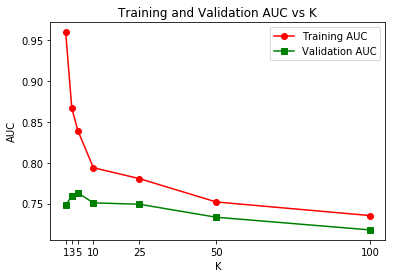

Train AUC: [0.95969186 0.86660307 0.83909301 0.79395871 0.7805364  0.751998
 0.73537069]
Validation AUC: [0.74784908 0.75957154 0.76296469 0.75092665 0.74921984 0.73332713
 0.71781539]


In [3]:
kList = [1, 3, 5, 10, 25, 50, 100]
tr_auc = np.zeros(len(kList))
va_auc = np.zeros(len(kList))


for  i, kValue in enumerate(kList):
    model = KNeighborsClassifier(n_neighbors=kValue)
    model.fit(X,Y)
    Yhat = model.predict(X)
    tr_auc[i] = roc_auc_score(Y, Yhat)
    Yhat = model.predict(Xval)
    va_auc[i] = roc_auc_score(Yval, Yhat)
    
plt.plot(kList, tr_auc, 'r', label='Training AUC', marker='o')
plt.plot(kList, va_auc, 'g', label='Validation AUC', marker='s')
plt.title("Training and Validation AUC vs K")
plt.xlabel("K")
plt.ylabel("AUC")
plt.xticks(kList)
plt.legend(framealpha=0.75)
plt.show()
print("Train AUC: {}".format(tr_auc))
print("Validation AUC: {}".format(va_auc))

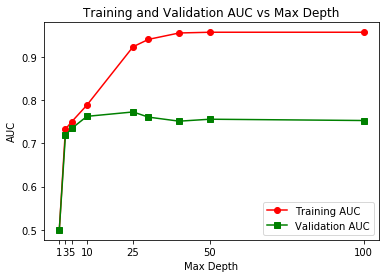

Train AUC: [0.5        0.73262986 0.74945004 0.78832676 0.92292897 0.93994875
 0.95473089 0.95641912 0.95641912]
Validation AUC: [0.5        0.7189187  0.73421058 0.76224501 0.77237419 0.76043319
 0.75108111 0.7555967  0.75260634]


In [4]:
maxDepth = [1, 3, 5, 10, 25, 30, 40, 50, 100]
tr_auc = np.zeros(len(maxDepth))
va_auc = np.zeros(len(maxDepth))

for  i, d in enumerate(maxDepth):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X,Y)
    Yhat = model.predict(X)
    tr_auc[i] = roc_auc_score(Y, Yhat)
    Yhat = model.predict(Xval)
    va_auc[i] = roc_auc_score(Yval, Yhat)
    
plt.plot(maxDepth, tr_auc, 'r', label='Training AUC', marker='o')
plt.plot(maxDepth, va_auc, 'g', label='Validation AUC', marker='s')
plt.title("Training and Validation AUC vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.xticks(kList)
plt.legend(framealpha=0.75)
plt.show()
print("Train AUC: {}".format(tr_auc))
print("Validation AUC: {}".format(va_auc))

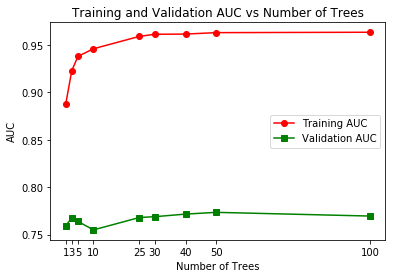

Train AUC: [0.88746742 0.92316748 0.93806149 0.94612427 0.959229   0.96143183
 0.96167    0.96317029 0.96358442]
Validation AUC: [0.75918924 0.76770014 0.76394783 0.75491797 0.76802236 0.76888534
 0.7716149  0.77346102 0.76954759]


In [5]:
trees = [1, 3, 5, 10, 25, 30, 40, 50, 100]
tr_auc = np.zeros(len(trees))
va_auc = np.zeros(len(trees))

for  i, t in enumerate(trees):
    model = RandomForestClassifier(n_estimators=t)
    model.fit(X,Y)
    Yhat = model.predict(X)
    tr_auc[i] = roc_auc_score(Y, Yhat)
    Yhat = model.predict(Xval)
    va_auc[i] = roc_auc_score(Yval, Yhat)
    
plt.plot(trees, tr_auc, 'r', label='Training AUC', marker='o')
plt.plot(trees, va_auc, 'g', label='Validation AUC', marker='s')
plt.title("Training and Validation AUC vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("AUC")
plt.xticks(trees)
plt.legend(framealpha=0.75)
plt.show()
print("Train AUC: {}".format(tr_auc))
print("Validation AUC: {}".format(va_auc))

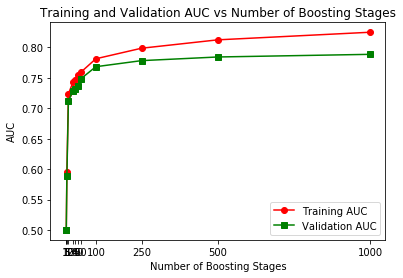

Train AUC: [0.5        0.5        0.59473167 0.72380617 0.742815   0.7472493
 0.7542075  0.75887198 0.78137349 0.79872457 0.81249027 0.82499693]
Validation AUC: [0.5        0.5        0.58920325 0.71197663 0.72865308 0.73202443
 0.73698108 0.74809872 0.76832677 0.77832063 0.78432051 0.78867499]


In [6]:
nEstimators = [1, 3, 5, 10, 25, 30, 40, 50, 100, 250, 500, 1000]
tr_auc = np.zeros(len(nEstimators))
va_auc = np.zeros(len(nEstimators))

for  i, n in enumerate(nEstimators):
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X,Y)
    Yhat = model.predict(X)
    tr_auc[i] = roc_auc_score(Y, Yhat)
    Yhat = model.predict(Xval)
    va_auc[i] = roc_auc_score(Yval, Yhat)
    
plt.plot(nEstimators, tr_auc, 'r', label='Training AUC', marker='o')
plt.plot(nEstimators, va_auc, 'g', label='Validation AUC', marker='s')
plt.title("Training and Validation AUC vs Number of Boosting Stages")
plt.xlabel("Number of Boosting Stages")
plt.ylabel("AUC")
plt.xticks(nEstimators)
plt.legend(framealpha=0.75)
plt.show()
print("Train AUC: {}".format(tr_auc))
print("Validation AUC: {}".format(va_auc))